In [10]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.simplefilter(action='ignore', category=FutureWarning)

In [11]:
train_data = pd.read_csv('concrete/train.csv', names=['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr', 'Fine Aggr', 'Output'])
test_data = pd.read_csv('concrete/test.csv', names=['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr', 'Fine Aggr', 'Output'])

X_train = train_data.iloc[:, :-1].values
y_train = train_data.iloc[:, -1].values
X_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values

X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

m, n = X_train.shape
initial_w = np.zeros(n)
tolerance = 1e-6
max_iterations = 10000
learning_rates = [1, 0.5, 0.25, 0.125, 0.0625, 0.03125]
best_rate = None
best_w = None

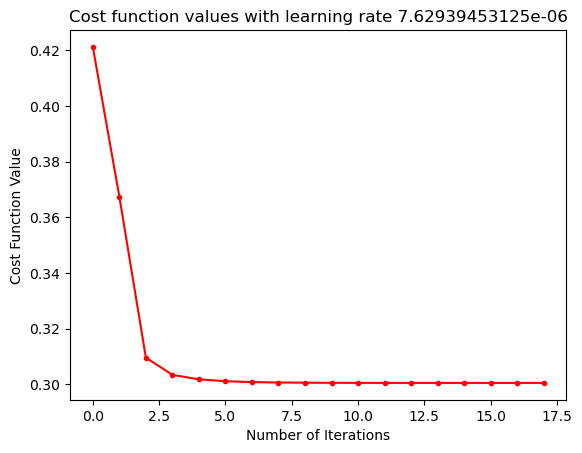

Batch GD converged with learning rate: 7.62939453125e-06
Learned weight vector: [-0.01590951 -0.00790805 -0.19994061 -0.15846366  0.37597151 -0.02943154
  0.11834296 -0.03381011]
Cost function value for the test data: 0.43436224502862536


In [12]:
def batch_gradient_descent(X, y, initial_w, learning_rates, tolerance):
    best_w = None
    best_rate = None
    best_costs = None

    for rate in learning_rates:
        w = initial_w.copy()
        prev_w = np.zeros(initial_w.shape)
        m = len(y)
        cost_values = []

        while True:
            predictions = X.dot(w)
            errors = predictions - y
            cost = np.mean(errors ** 2) / 2
            cost_values.append(cost)

            gradient = X.T.dot(errors) / m
            w -= rate * gradient

            if np.linalg.norm(w - prev_w, 2) < tolerance:
                best_w = w
                best_rate = rate
                best_costs = cost_values
                return best_w, best_rate, best_costs

            prev_w = w.copy()
            rate *= 0.5 

initial_w = np.zeros(X_train.shape[1])
learning_rates = [1.0]
tolerance = 1e-6

best_w, best_rate, best_costs = batch_gradient_descent(X_train, y_train, initial_w, learning_rates, tolerance)

plt.plot(best_costs, marker='o', markersize=3, color="red")
plt.title(f"Cost function values with learning rate {best_rate}")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost Function Value")
plt.show()

print(f"Batch GD converged with learning rate: {best_rate}")
print(f"Learned weight vector: {best_w}")
test_errors = X_test.dot(best_w) - y_test
test_cost = np.mean(test_errors ** 2) / 2

print(f"Cost function value for the test data: {test_cost}")

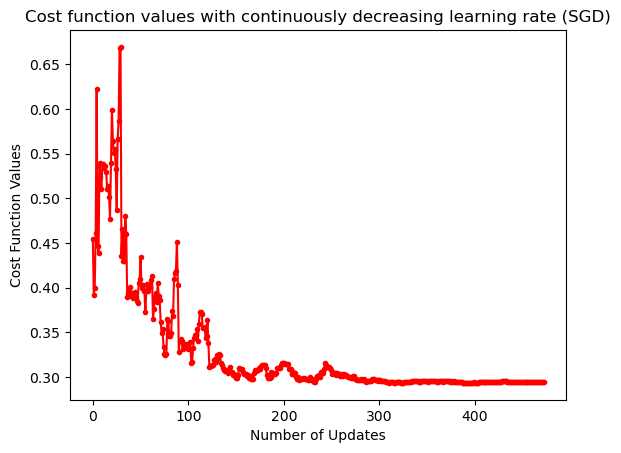

SGD converged
Learned weight vector: [-0.0337588  -0.16231538 -0.26223498 -0.24132469  0.56024098 -0.01197553
  0.23938427  0.02166997]
Cost function value: 0.44046726198638764


In [7]:
def stochastic_gradient_descent(X, y, initial_w, initial_learning_rate, tolerance):
    w = initial_w.copy()
    m = len(y)
    cost_values = []
    learning_rate = initial_learning_rate

    while True:
        i = np.random.randint(0, m)
        x_i = X[i, :]
        y_i = y[i]

        prediction = x_i.dot(w)
        error = prediction - y_i
        gradient = x_i.T * error
        w -= learning_rate * gradient

        predictions = X.dot(w)
        errors = predictions - y
        cost = np.mean(errors ** 2) / 2
        cost_values.append(cost)

        if len(cost_values) > 1 and abs(cost_values[-1] - cost_values[-2]) < tolerance:
            return w, cost_values  

        learning_rate *= 0.99

initial_w = np.zeros(X_train.shape[1])
initial_learning_rate = 0.1  
tolerance = 1e-6

sgd_w, sgd_cost_values = stochastic_gradient_descent(X_train, y_train, initial_w, initial_learning_rate, tolerance)

plt.plot(sgd_cost_values, marker='o', markersize=3, color="red")
plt.title(f"Cost function values with continuously decreasing learning rate (SGD)")
plt.xlabel("Number of Updates")
plt.ylabel("Cost Function Values")
plt.show()

if len(sgd_cost_values) < 10000:
    print(f"SGD converged")
    print(f"Learned weight vector: {sgd_w}")

    test_errors = X_test.dot(sgd_w) - y_test
    test_cost = np.mean(test_errors ** 2) / 2
    print(f"Cost function value: {test_cost}")
else:
    print("Did not converge.")

In [6]:
# Formula: w = (X^T * X)^(-1) * X^T * y
X_train_transpose = X_train.T
optimal_w = np.linalg.inv(X_train_transpose.dot(X_train)).dot(X_train_transpose).dot(y_train)

test_errors_optimal = X_test.dot(optimal_w) - y_test
test_cost_optimal = np.mean(test_errors_optimal ** 2) / 2

print(f"Learned weight vector: {optimal_w}")
print(f"Cost function value: {test_cost_optimal}")

Learned weight vector: [-0.01519667  0.90056451  0.78629331  0.85104314  1.29889413  0.12989067
  1.57224887  0.99869359]
Cost function value for the test data: 0.46723528959877575
